# Homework1

Please upload to Moodle your archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. Please also prepare a requirements.txt file which lists all the packages that you use for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".
Please name your archive using your full name and student id. For your Notebook please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write.
Your code and analysis is like a story that awaits to be read, make it a nice story please!

**Deadline: Sunday, 26 February, 2017, midnight.** 

## Exercises

This homework focuses on data exploration and preparation for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. The goal is to explore and transform the data to try and understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product.

We have a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [50] Prepare a data quality report for the CSV file. 
    - [2.5] Check how many rows and columns your CSV has.
    - [2.5] Show the first and the last 5 rows.
    - [10] Prepare a table with descriptive statistics for all the continuous features.
    - [10] Prepare a table with descriptive statistics for all the categorical features.
    - [5] Drop duplicate rows and columns, if any.
    - [5] Drop constant columns, if any.
    
    For the updated CSV and data frame (after column/row removal):
    - [2.5] Prepare a table with descriptive statistics for all the continuous features.
    - [2.5] Prepare a table with descriptive statistics for all the categorical features.
    - [2.5] Plot histograms for all the continuous features.
    - [2.5] Plot box plots for all the continuous features.
    - [2.5] Plot bar plots for all the categorical features.
    - [2.5] Save all the tables, plots and initial discussion of your findings, into a single data quality report file.   

(2). [30] Prepare a data quality plan for the CSV file.
    - [10] Mark down all the features where there are potential problems or data quality issues.
    - [10] Propose solutions to deal with the problems identified. Explain why did you choose one solution over (potentially many) other.
    - [10] Apply your solutions to obtain a new CSV file where the data quality issues identified were addressed. Save the new CSV file with a self_explanatory name. Save the data quality plan to a single file (as a table or structured text).
        
(3). [20] Exploring relationships between feature pairs:
    - [10] Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.
    - [10] Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (IsWinner)? Explain in plain words (a short paragraph) the story of your findings so far.


# Q1 Data Quality Report Preparation

## Q1(i) Check how many rows and columns your csv has.

In [1]:
#Q1(i)

import pandas as pd
df = pd.read_csv('amazon-offers-10k-samples-raw.csv')


# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook
%matplotlib inline

import matplotlib.patches as mpatches


# Displaying first 5 rows

# How many rows
rows = df.shape[0]
print("Number of Rows is:", rows)

# How many Columns
columns = df.shape[1]
print("Number of Columns is:", columns)


Number of Rows is: 10000
Number of Columns is: 21


## Q1 (ii) Show the first and the last 5 rows.

In [2]:
# Q1 (ii-a)

# Displaying first 5 rows
df.head(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1207135739277432339,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1789487307643024748,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5452082314297826053,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2572277640783537773,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8704029307873847986,8.99,CAD,24,48,NOW,1,CA,ON,new


In [3]:
# Q1 (ii-b)

# Displaying last 5 rows
df.tail(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
9995,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,"Dispatched from England by Priority Airmail, a...",1,0,92.72,CAD,91,...,-1888136325356517677,7.50,CAD,72,96,NOW,1,NaN,NaN,new
9996,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,96.77,CAD,88,...,-6639690782514669126,11.84,CAD,96,120,NOW,1,NaN,NaN,new
9997,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,110.68,CAD,96,...,9012427554787096099,6.00,CAD,24,48,NOW,1,NaN,NaN,new
9998,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,105.73,CAD,0,...,3846853762521352076,15.26,CAD,24,48,NOW,1,NaN,NaN,new
9999,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,Duty free - Ships from USA,1,0,134.25,CAD,98,...,1163115142515862290,0.00,CAD,24,48,NOW,1,US,CA,new


## Q1(iii) Prepare a table with descriptive statistics for all the continuous features.

In [4]:
# Q1 (iii)

# descriptive statistics for all the continuous features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsWinner,10000.0,5.490000e-02,2.277964e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
MarketplaceId,10000.0,1.156462e+18,2.355318e+04,1.156462e+18,1.156462e+18,1.156462e+18,1.156462e+18,1.156462e+18
ProductId,10000.0,5.534192e+16,5.308389e+18,-9.172604e+18,-4.356483e+18,2.477570e+16,5.056101e+18,9.207147e+18
IsFeaturedMerchant,10000.0,8.166000e-01,3.870135e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
IsFulfilledByAmazon,10000.0,3.680000e-02,1.882799e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136118e+18,-2.572278e+18,1.163115e+18,5.477945e+18,9.174048e+18
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02


## Q1 (iv) Prepare a table with descriptive statistics for all the categorical features.

In [5]:
# Q1 (iv)

#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes    

#Look at the categorical features only
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758
ListingCurrency,10000,1,CAD,10000
ShippingCurrency,10000,1,CAD,10000
ShippingTime_availtype,10000,1,NOW,10000
ShipsFromCountry,6273,13,CA,3668
ShipsFromState,5880,24,ON,2220
SubCondition,10000,1,new,10000


## Q1(v) Drop duplicate rows and columns, if any.

In [6]:
# Q1 (v) Drop duplicate rows and columns
dfmod = df
print(dfmod.dtypes) #test to check dfmod picked up dtypes
# Turns out data types are not all numeric - as a result the df.loc method encounters issues...


dfmod.drop_duplicates(subset=None, inplace=True) 


# Q1 (v-b) Drop consant columns
# used categorical features to identify unique column values  > 1 and manually hardcoded them below

#Sourced from Stack Overflow (http://stackoverflow.com/questions/20209600/panda-dataframe-remove-constant-column)
dfmod = dfmod.loc[:,dfmod.apply(pd.Series.nunique) != 1]

#identifies column as unique if nunique value is not equal to one.
# initially attempted a system that looked at numeric value of data but this was in issuedueto varied datatypes including categories
# numeric style solution: f.loc[:, (df != df.ix[0]).any()] #sourced from StackOverflow

dfmod.to_csv('Modified-File.csv')
#dfmod.dtypes test for datatypes to see if method above would work

IsWinner                     int64
MarketplaceId                int64
ProductId                    int64
TimeOfOfferChange         category
ConditionNotes            category
IsFeaturedMerchant           int64
IsFulfilledByAmazon          int64
ListingPrice               float64
ListingCurrency           category
SellerFeedbackRating         int64
SellerFeedbackCount          int64
SellerId                     int64
ShippingPrice              float64
ShippingCurrency          category
ShippingTime_minHours        int64
ShippingTime_maxHours        int64
ShippingTime_availtype    category
ShipsDomestically            int64
ShipsFromCountry          category
ShipsFromState            category
SubCondition              category
dtype: object


## Q1(vi) Drop constant columns, if any.

In [7]:
# Q1 (vi) Prepare a table with descriptive statistics for all the continuous features.

# descriptive statistics for all the continuous features
dfmod.describe().T

,count,mean,std,min,25%,50%,75%,max
IsWinner,9886.0,5.533077e-02,2.286363e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ProductId,9886.0,6.104485e+16,5.315584e+18,-9.172604e+18,-4.356483e+18,2.477570e+16,5.056101e+18,9.207147e+18
IsFeaturedMerchant,9886.0,8.183290e-01,3.855927e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
IsFulfilledByAmazon,9886.0,3.712320e-02,1.890732e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ListingPrice,9886.0,2.164802e+02,2.565794e+02,3.240000e+00,6.363000e+01,1.259900e+02,2.578625e+02,3.194320e+03
SellerFeedbackRating,9886.0,8.897593e+01,2.155962e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,9886.0,6.910402e+03,1.091824e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,9886.0,9.641003e+17,4.919222e+18,-9.136118e+18,-2.572278e+18,1.163115e+18,5.477945e+18,9.174048e+18
ShippingPrice,9886.0,1.243470e+01,2.647657e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.368000e+01,7.052700e+02
ShippingTime_minHours,9886.0,5.726644e+01,8.280107e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02


## Q1(vii) Prepare a table with descriptive statistics for all the continuous features.

In [8]:
# Q1 (vii) Prepare a table with descriptive statistics for all the categorical features.

#Select all columns of type 'object'
object_columns = dfmod.select_dtypes(['object']).columns
object_columns

#Convert selected columns to type 'category'
for column in object_columns:
    dfmod[column] = dfmod[column].astype('category')
df.dtypes    

#Look at the categorical features only
dfmod.select_dtypes(['category']).describe().T

,count,unique,top,freq
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20
ConditionNotes,5260,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,756
ShipsFromCountry,6217,13,CA,3655
ShipsFromState,5851,24,ON,2211


## Q1(viii) Plot histograms for all the continuous features

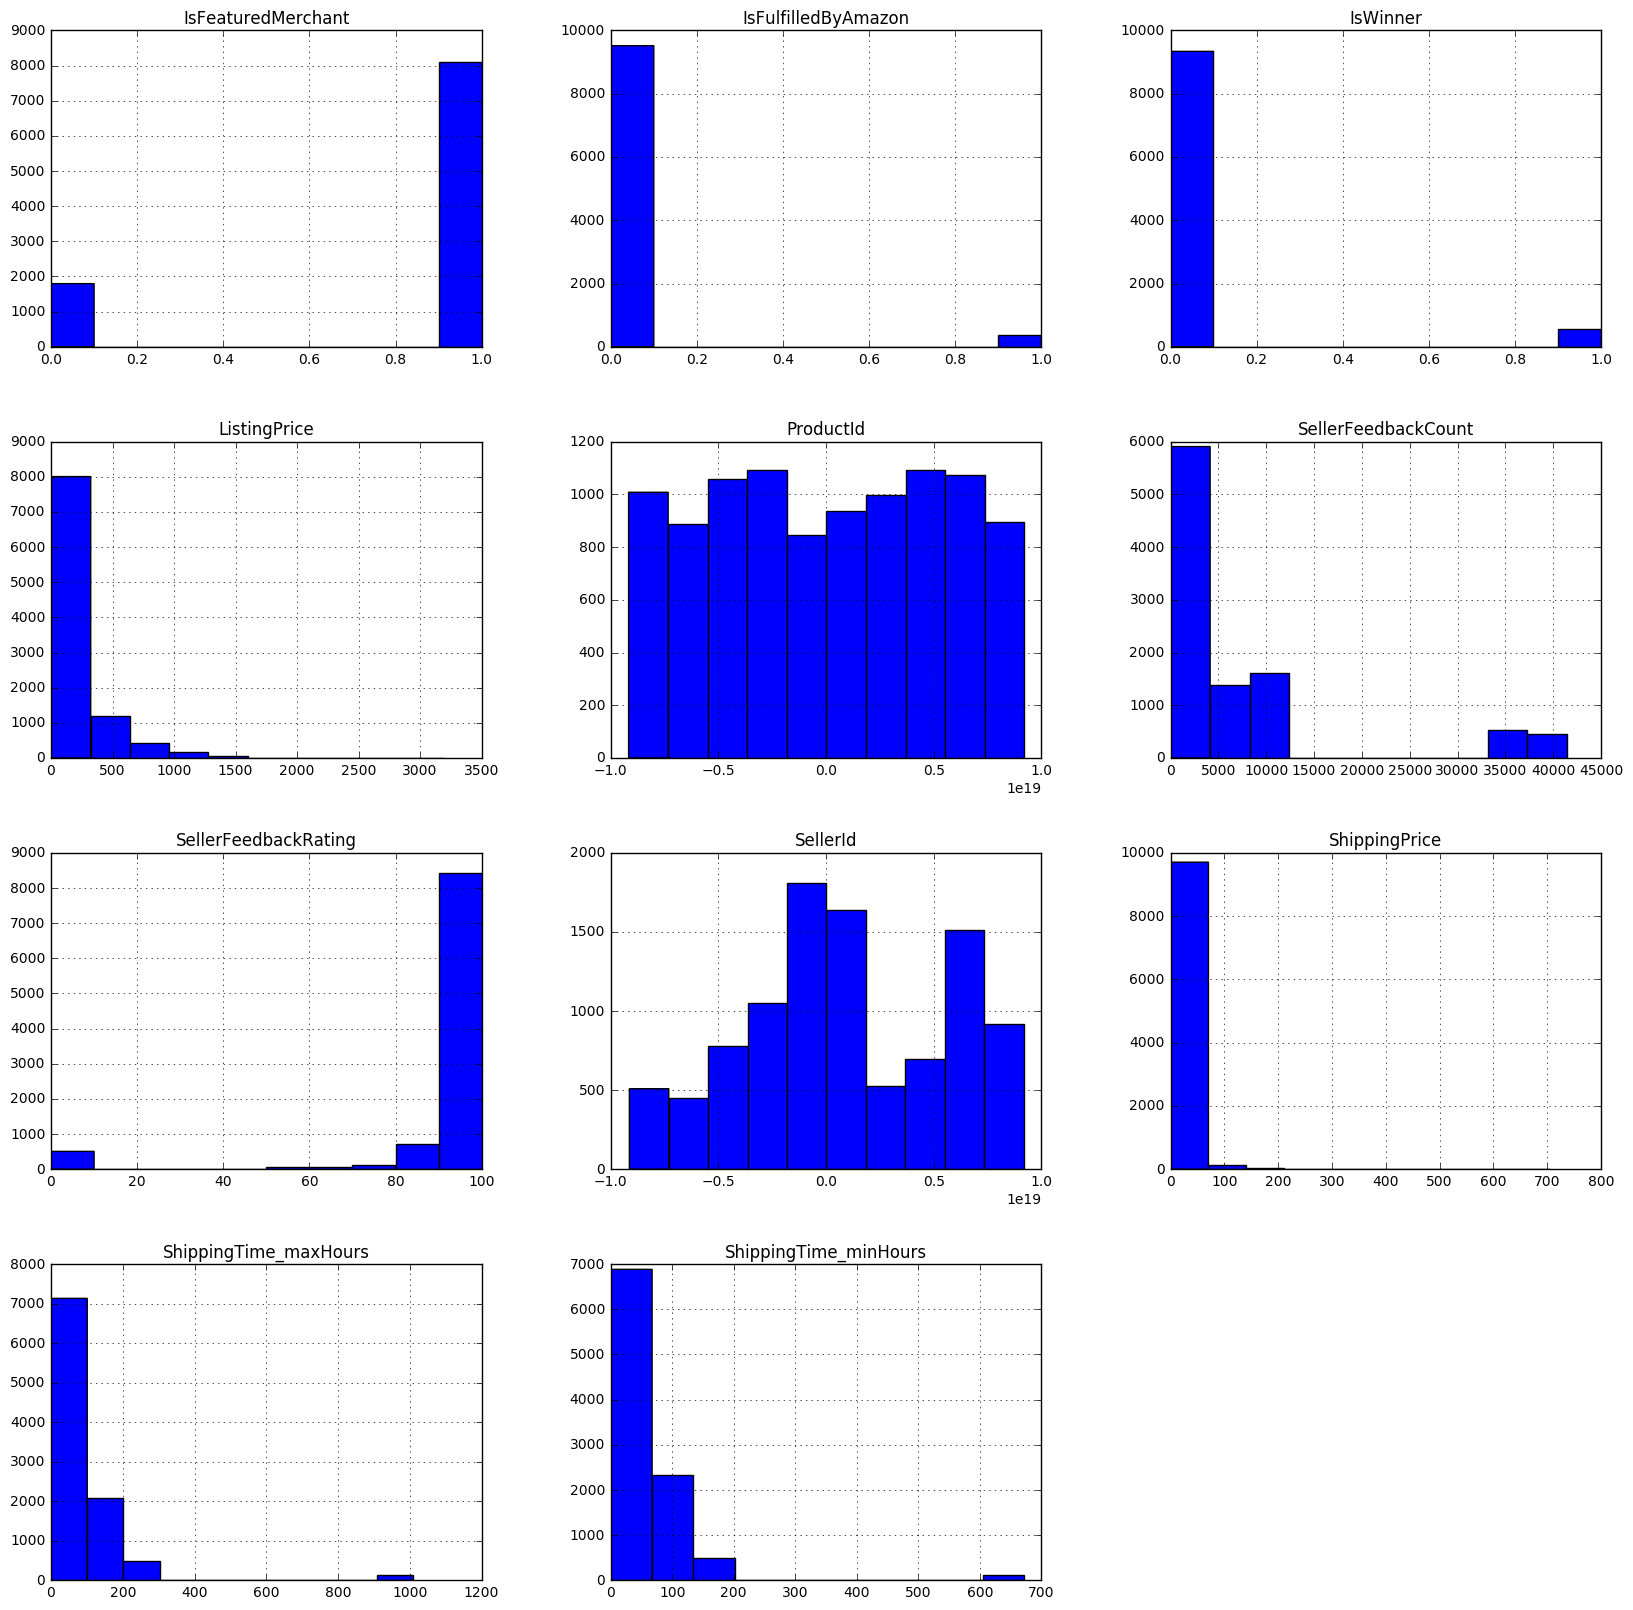

In [22]:
# Q1 (viii) Plot histograms for all the continuous features

#This displays all of the histograms together
dfmod.hist(figsize=(20, 20))

#plt.savefig('Histogram-Data.png')

## Q1 (ix) Plot box plots for all the continuous features.

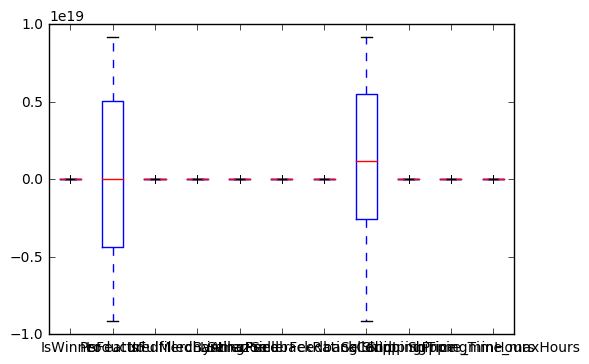

In [23]:
#Q1 (ix) Plot box plots for all the continuous features.
# May wish separate plots for each set of data to more accurately read data
plt.figure(figsize=(800, 600))
#dfmod.plot(kind='box')
#dfmod.plot.box()

#the commented code will give smaller sub set diagram - easier to read column key along bottom...
#dfmod[['IsWinner','ProductId', 'IsFeaturedMerchant','IsledByAmazon']].plot(kind='box')

# displays plot boxes for all categories - 2 specific categories stand out and are dealt with below
dfmod.plot(kind='box')
#plt.savefig('Boxplot-Overall-Data.png')

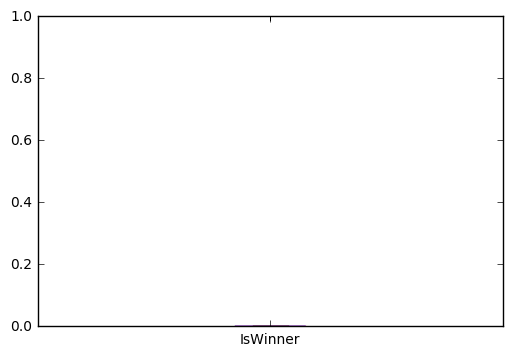

In [24]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['IsWinner'].plot(kind='box')
#plt.savefig('Boxplot-IsWinner.png')

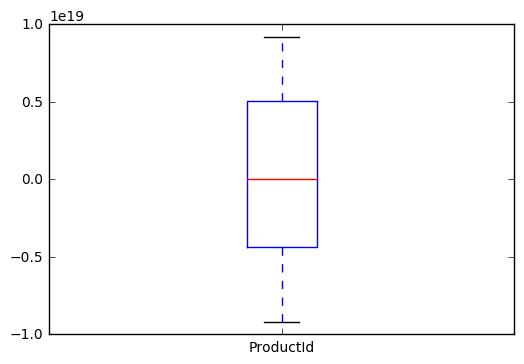

In [25]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['ProductId'].plot(kind='box')
#plt.savefig('Boxplot-ProductID.png')

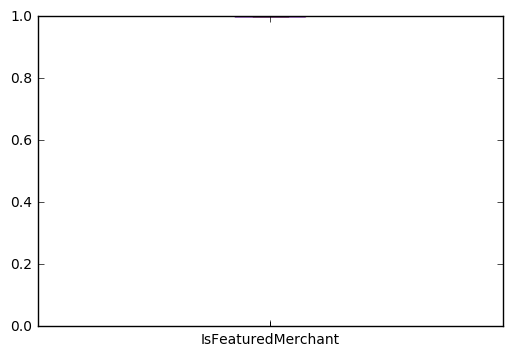

In [26]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['IsFeaturedMerchant'].plot(kind='box')
#plt.savefig('Boxplot-IsFeaturedMerchant.png')

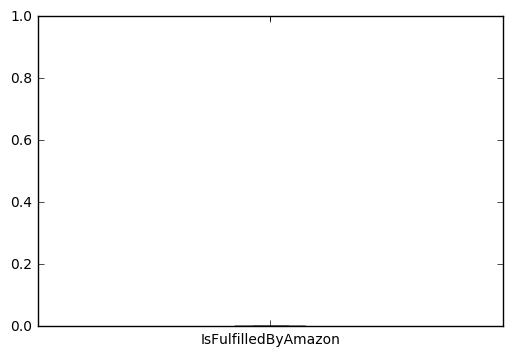

In [27]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['IsFulfilledByAmazon'].plot(kind='box')
#plt.savefig('Boxplot-IsFulfilledByAmazon.png')

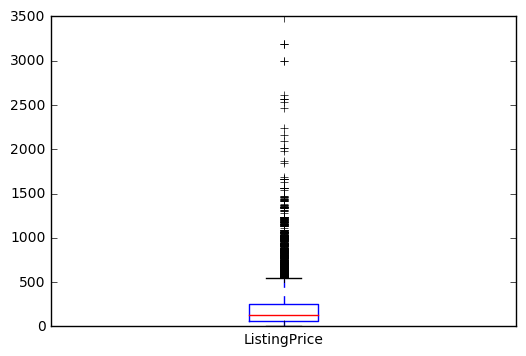

In [9]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['ListingPrice'].plot(kind='box')
plt.savefig('Boxplot-ListingPrice.png')

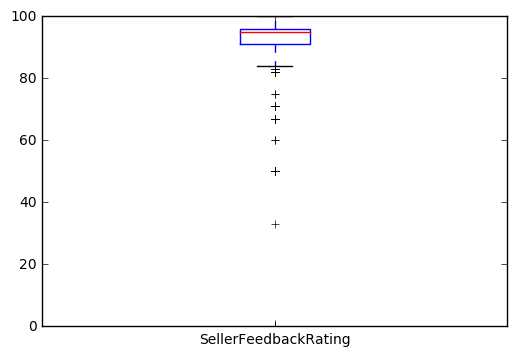

In [10]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['SellerFeedbackRating'].plot(kind='box')
#plt.savefig('Boxplot-SellerFeedbackRating.png')

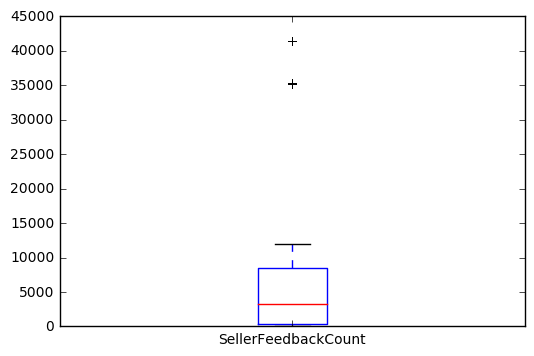

In [11]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['SellerFeedbackCount'].plot(kind='box')
#plt.savefig('Boxplot-SellerFeedbackCount.png')

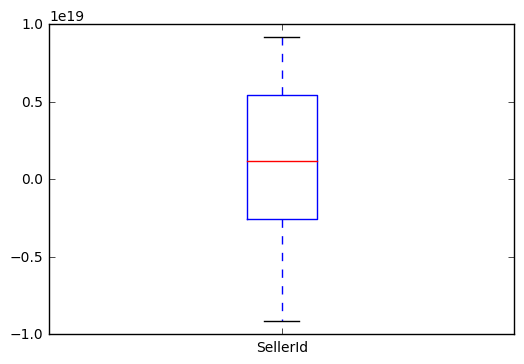

In [31]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['SellerId'].plot(kind='box')
#plt.savefig('Boxplot-SellerId.png')

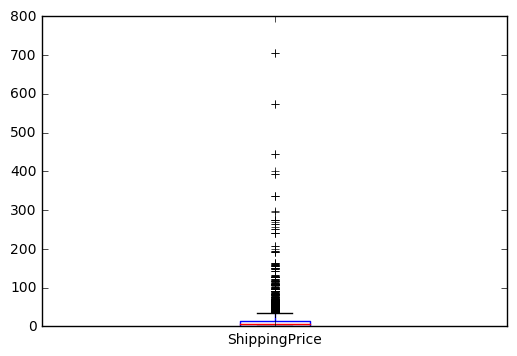

In [15]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['ShippingPrice'].plot(kind='box')
#plt.savefig('Boxplot-ShippingPrice.png')

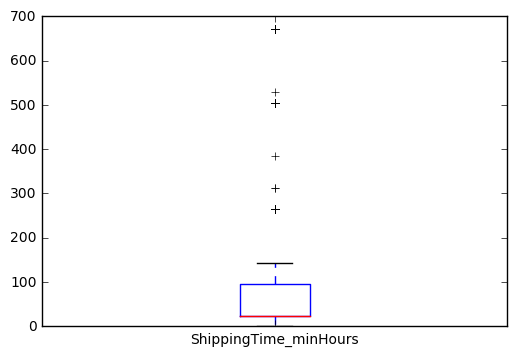

In [13]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['ShippingTime_minHours'].plot(kind='box')
#plt.savefig('Boxplot-ShippingTime_minHours.png')

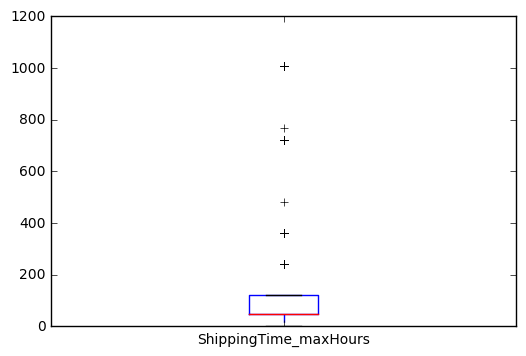

In [16]:
#Q1 (ix) Plot box plots for all the continuous features.
dfmod['ShippingTime_maxHours'].plot(kind='box')
#plt.savefig('Boxplot-ShippingTime_maxHours.png')

## Q1(x) Plot bar plots for all the categorical features.

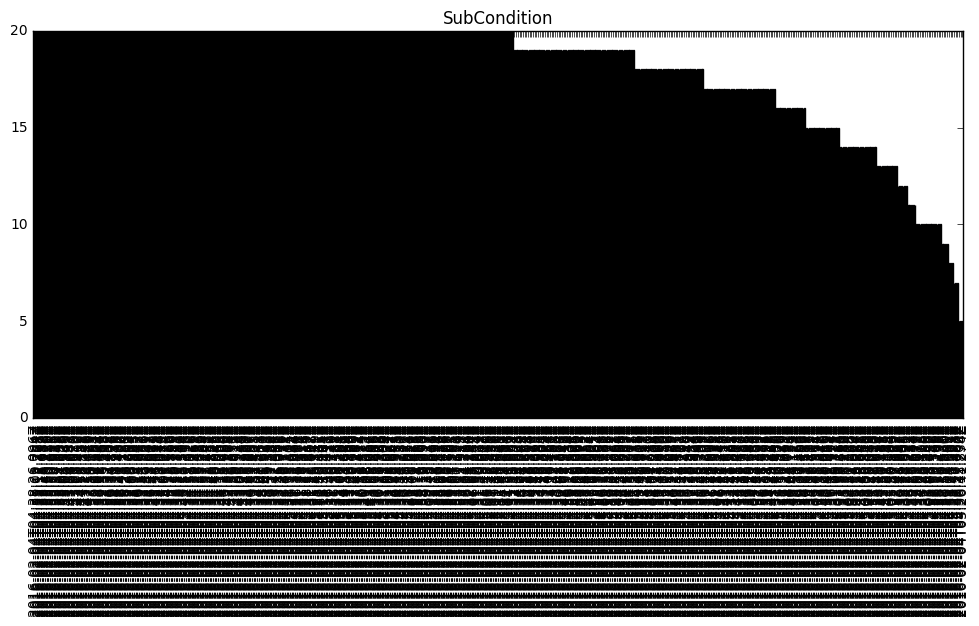

In [35]:
#Q1 (x) Plot bar plots for all the categorical features

plt.title("Time Of Offer Change")
dfmod['TimeOfOfferChange'].value_counts().plot(kind='bar', title=column, figsize=(12,5))

#plt.savefig('TimeOfOfferChange.png')
    

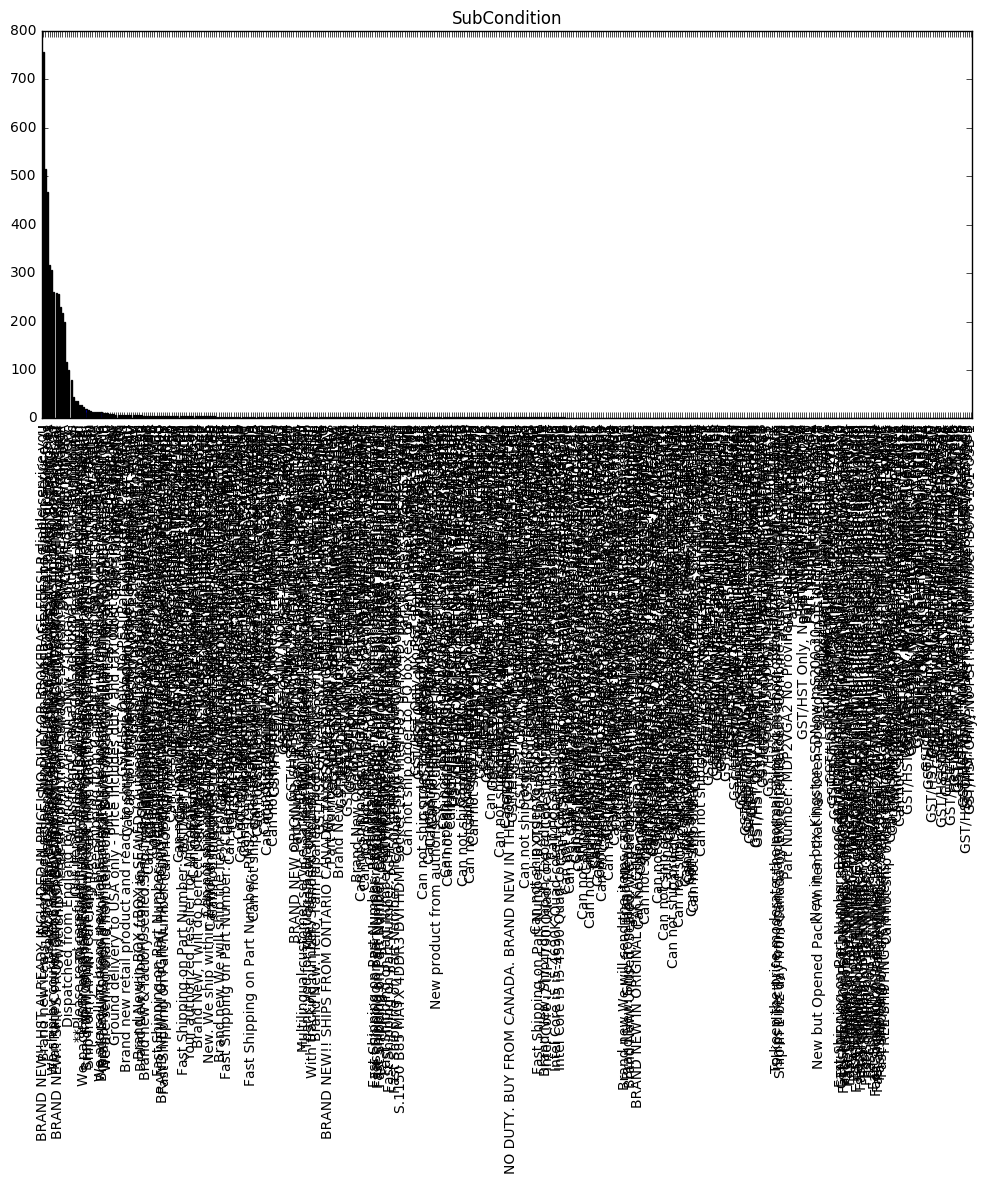

In [36]:

#Q1 (x) Plot bar plots for all the categorical features
plt.title("Condition Notes")
dfmod['ConditionNotes'].value_counts().plot(kind='bar', title=column, figsize=(12,5))
#plt.savefig('ConditionNotes.png')

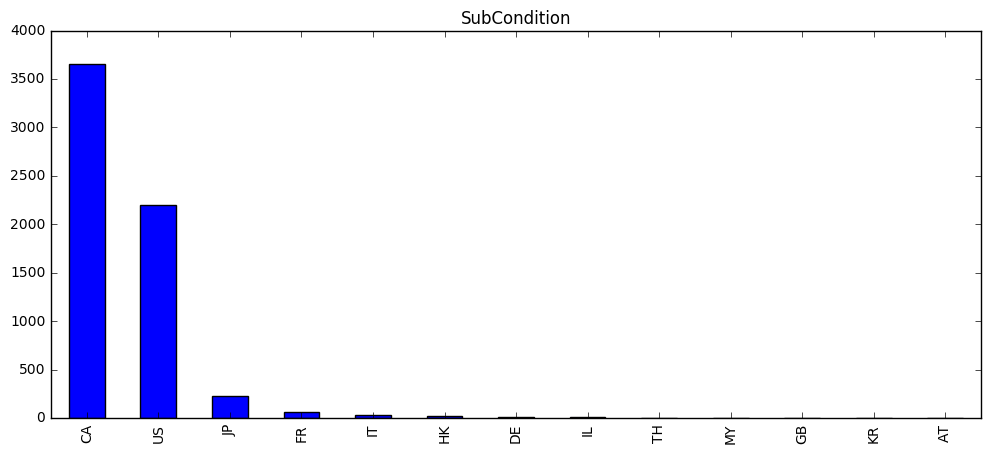

In [37]:
#Q1 (x) Plot bar plots for all the categorical features

plt.title("Ships From Country")
dfmod['ShipsFromCountry'].value_counts().plot(kind='bar', title=column, figsize=(12,5))
#plt.savefig('ShipsFromCountry.png')

    

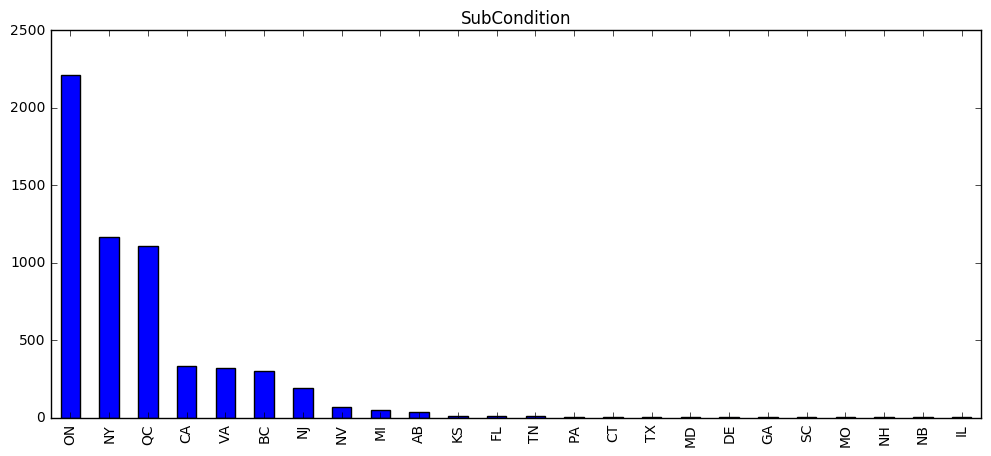

In [9]:
#Q1 (x) Plot bar plots for all the categorical features

plt.title("Ships From State")
dfmod['ShipsFromState'].value_counts().plot(kind='bar', title=column, figsize=(12,5))
plt.savefig('ShipsFromState.png')


## Q1(xi) Save all the tables, plots and initial discussion of your findings, into a single data quality report file

In [38]:
#Q1 (xi) Save all the tables, plots and initial discussion of your findings, into a single data quality report file
# this code was used to output the excel data for the report - output code currently commented out

#exporting details to csv files so I can incorporate in data quality report.
#commented out export elements - uncomment to get expected output to new csv files.

data_quality_report_numeric_table = dfmod.describe().T
#data_quality_report_numeric_table.to_csv("Data_Quality_Report_Numberic.csv", index_label='Feature')

data_quality_report_categorical_table = dfmod.select_dtypes(['category']).describe().T
#data_quality_report_categorical_table.to_csv("Data_Quality_Report_Categorical.csv", index_label='Feature')

data_quality_report_categorical_table

,count,unique,top,freq
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20
ConditionNotes,5260,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,756
ShipsFromCountry,6217,13,CA,3655
ShipsFromState,5851,24,ON,2211


# Q2. Data Quality Plan

In [39]:
#extra check for Data Quality Report
dfmod.isnull().sum()

IsWinner                    0
ProductId                   0
TimeOfOfferChange           0
ConditionNotes           4626
IsFeaturedMerchant          0
IsFulfilledByAmazon         0
ListingPrice                0
SellerFeedbackRating        0
SellerFeedbackCount         0
SellerId                    0
ShippingPrice               0
ShippingTime_minHours       0
ShippingTime_maxHours       0
ShipsFromCountry         3669
ShipsFromState           4035
dtype: int64

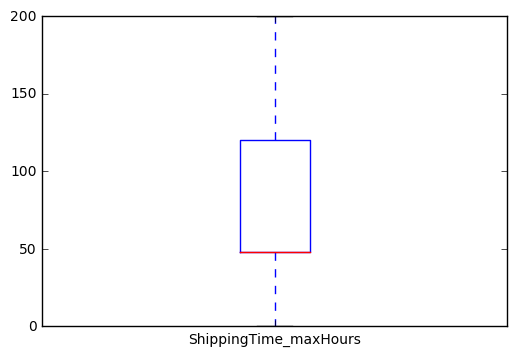

In [40]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['ShippingTime_maxHours'].clip(0,200).plot(kind='box')
#plt.savefig('Boxplot-ShippingTime_maxHours.png')

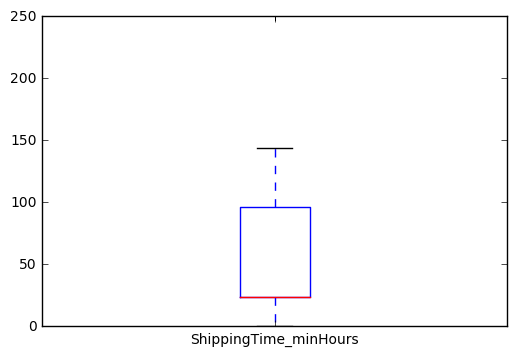

In [41]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['ShippingTime_minHours'].clip(0,250).plot(kind='box')
#plt.savefig('Boxplot-ShippingTime_minHours.png')

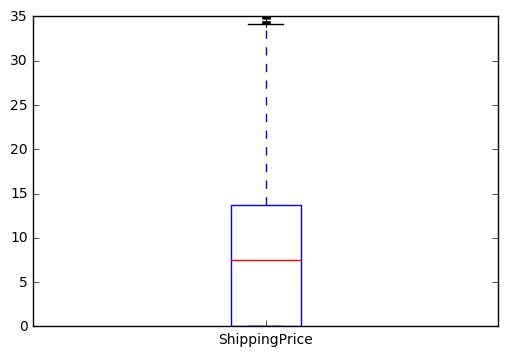

In [42]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['ShippingPrice'].clip(0,35).plot(kind='box')
#plt.savefig('Boxplot-ShippingPrice.png')

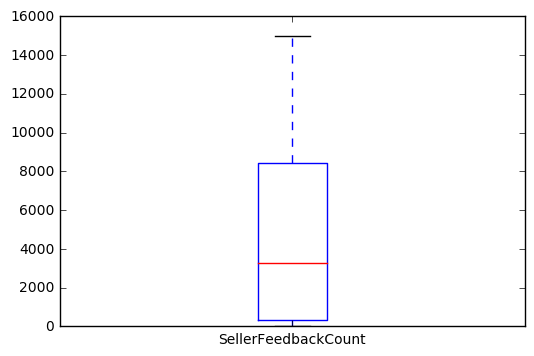

In [43]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['SellerFeedbackCount'].clip(0,15000).plot(kind='box')
#plt.savefig('Boxplot-SellerFeedbackCount.png')

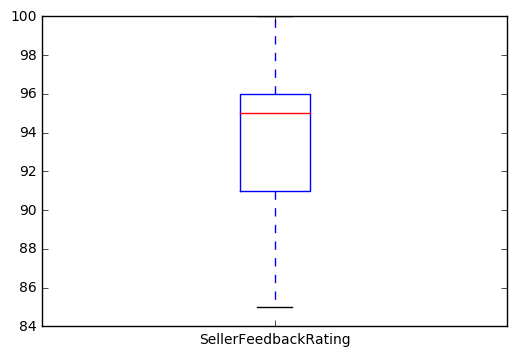

In [44]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['SellerFeedbackRating'].clip(85,100).plot(kind='box')
#plt.savefig('Boxplot-SellerFeedbackRating.png')

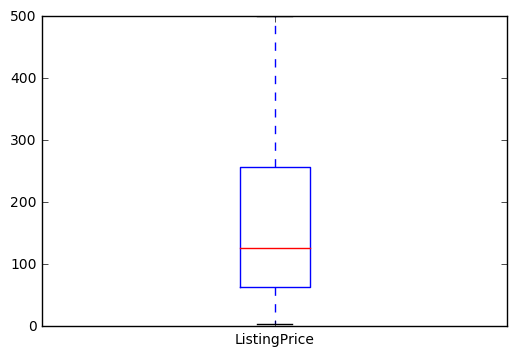

In [45]:
#Q2 (iii) Clamp Transformation for updated Quality Report
dfmod['ListingPrice'].clip(0,500).plot(kind='box')
#plt.savefig('Boxplot-ListingPrice.png')

In [46]:
#Calculating total number of Yes values (represented by value 1 in data) for isWinner
dfmod['IsWinner'].sum()

547

In [47]:
#Calculating total number of Yes values (represented by value 1 in data) for isFeaturedMerchant
dfmod['IsFeaturedMerchant'].sum()

8090

In [48]:
#Calculating total number of Yes values (represented by value 1 in data) for isFulfilledByAmazon
dfmod['IsFulfilledByAmazon'].sum()

367

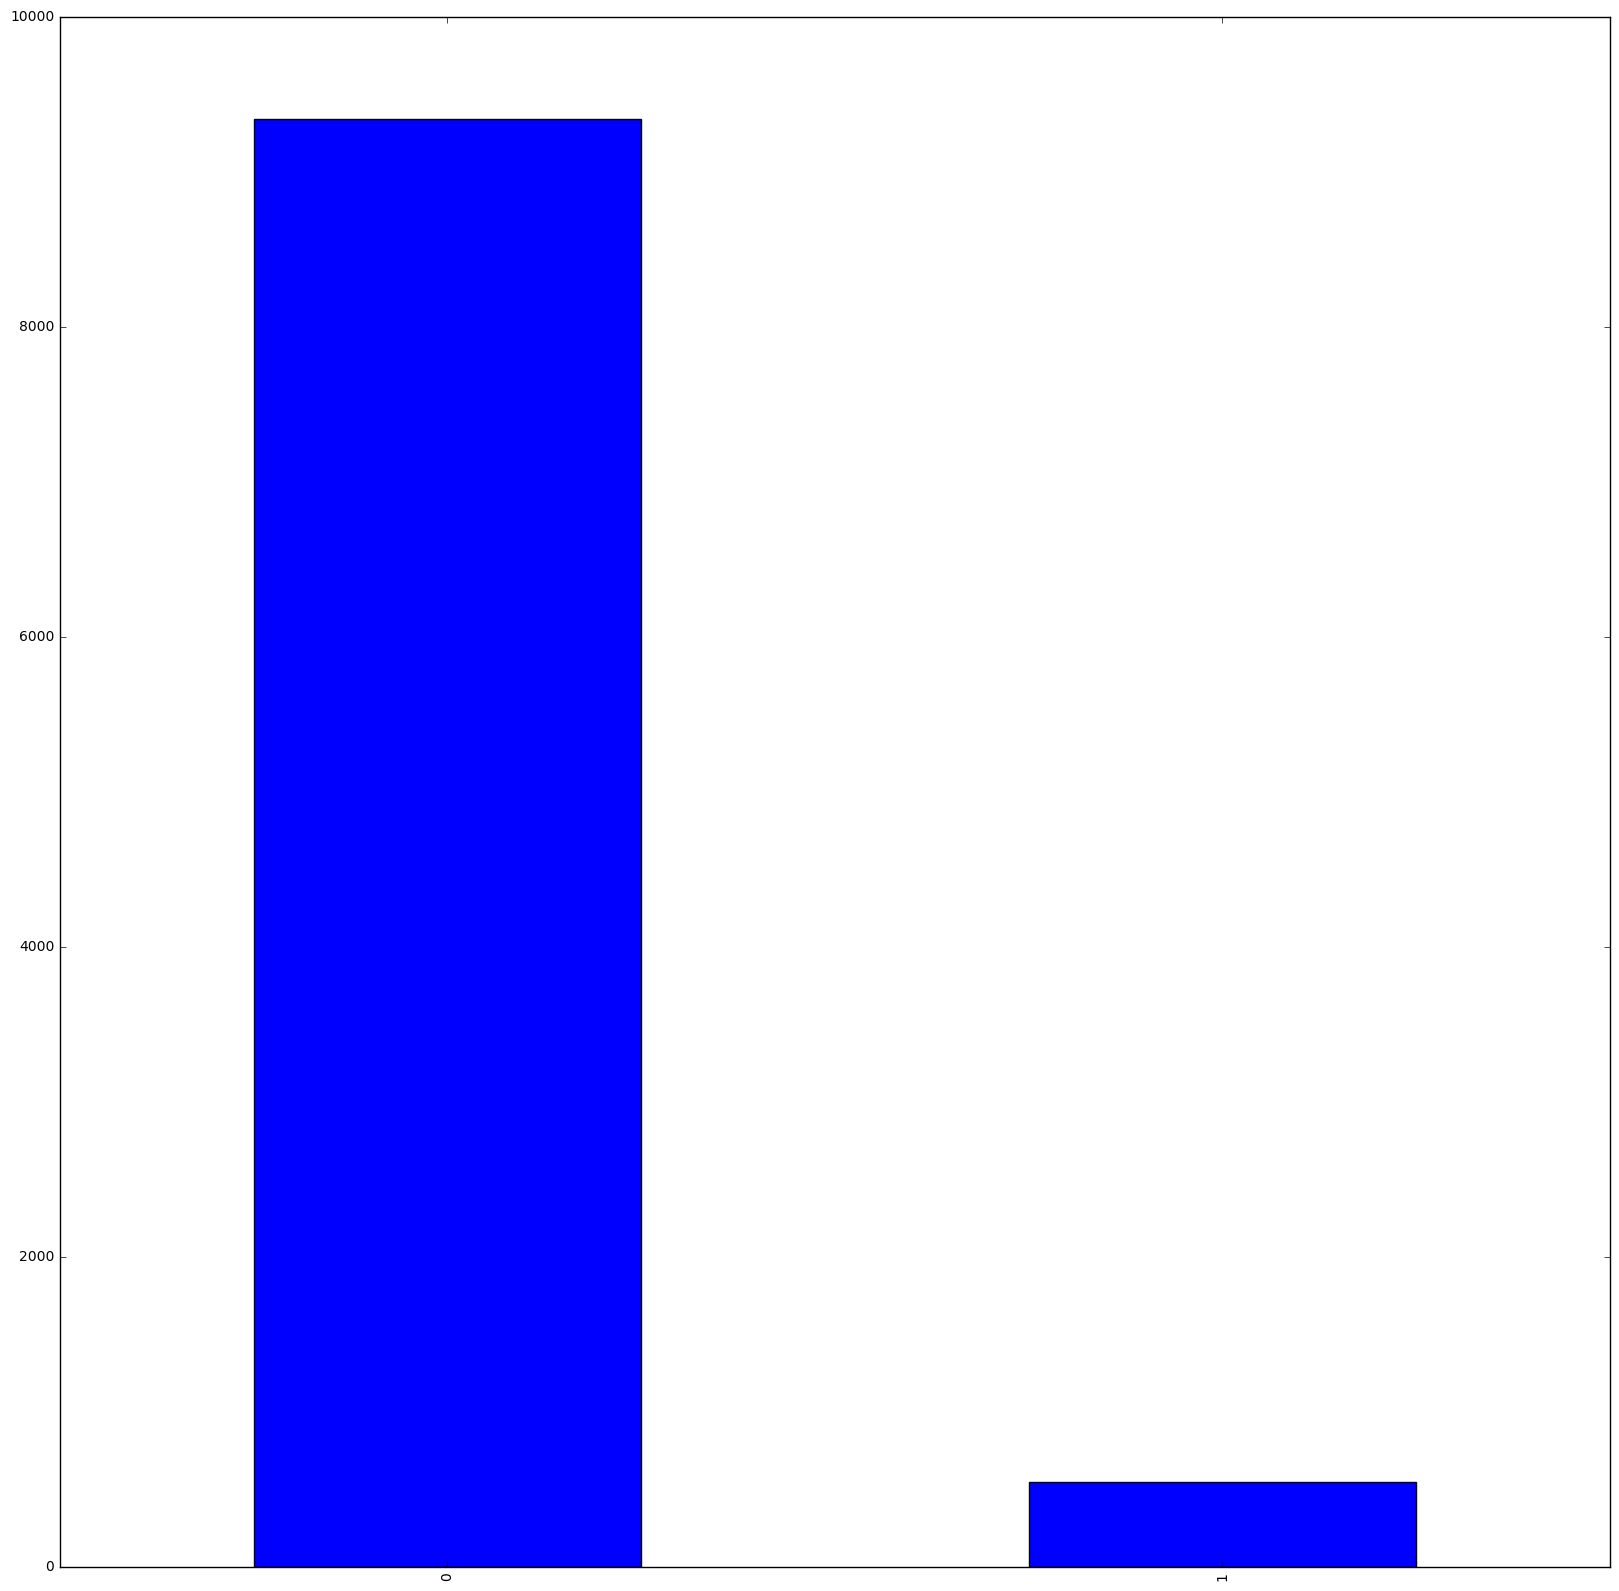

In [49]:
#Replotting is Winner as box plot

plt.figure(figsize=(20, 20))
dfmod['IsWinner'].value_counts().plot(kind='bar')

#plt.savefig('IsWinner-barplot.png')

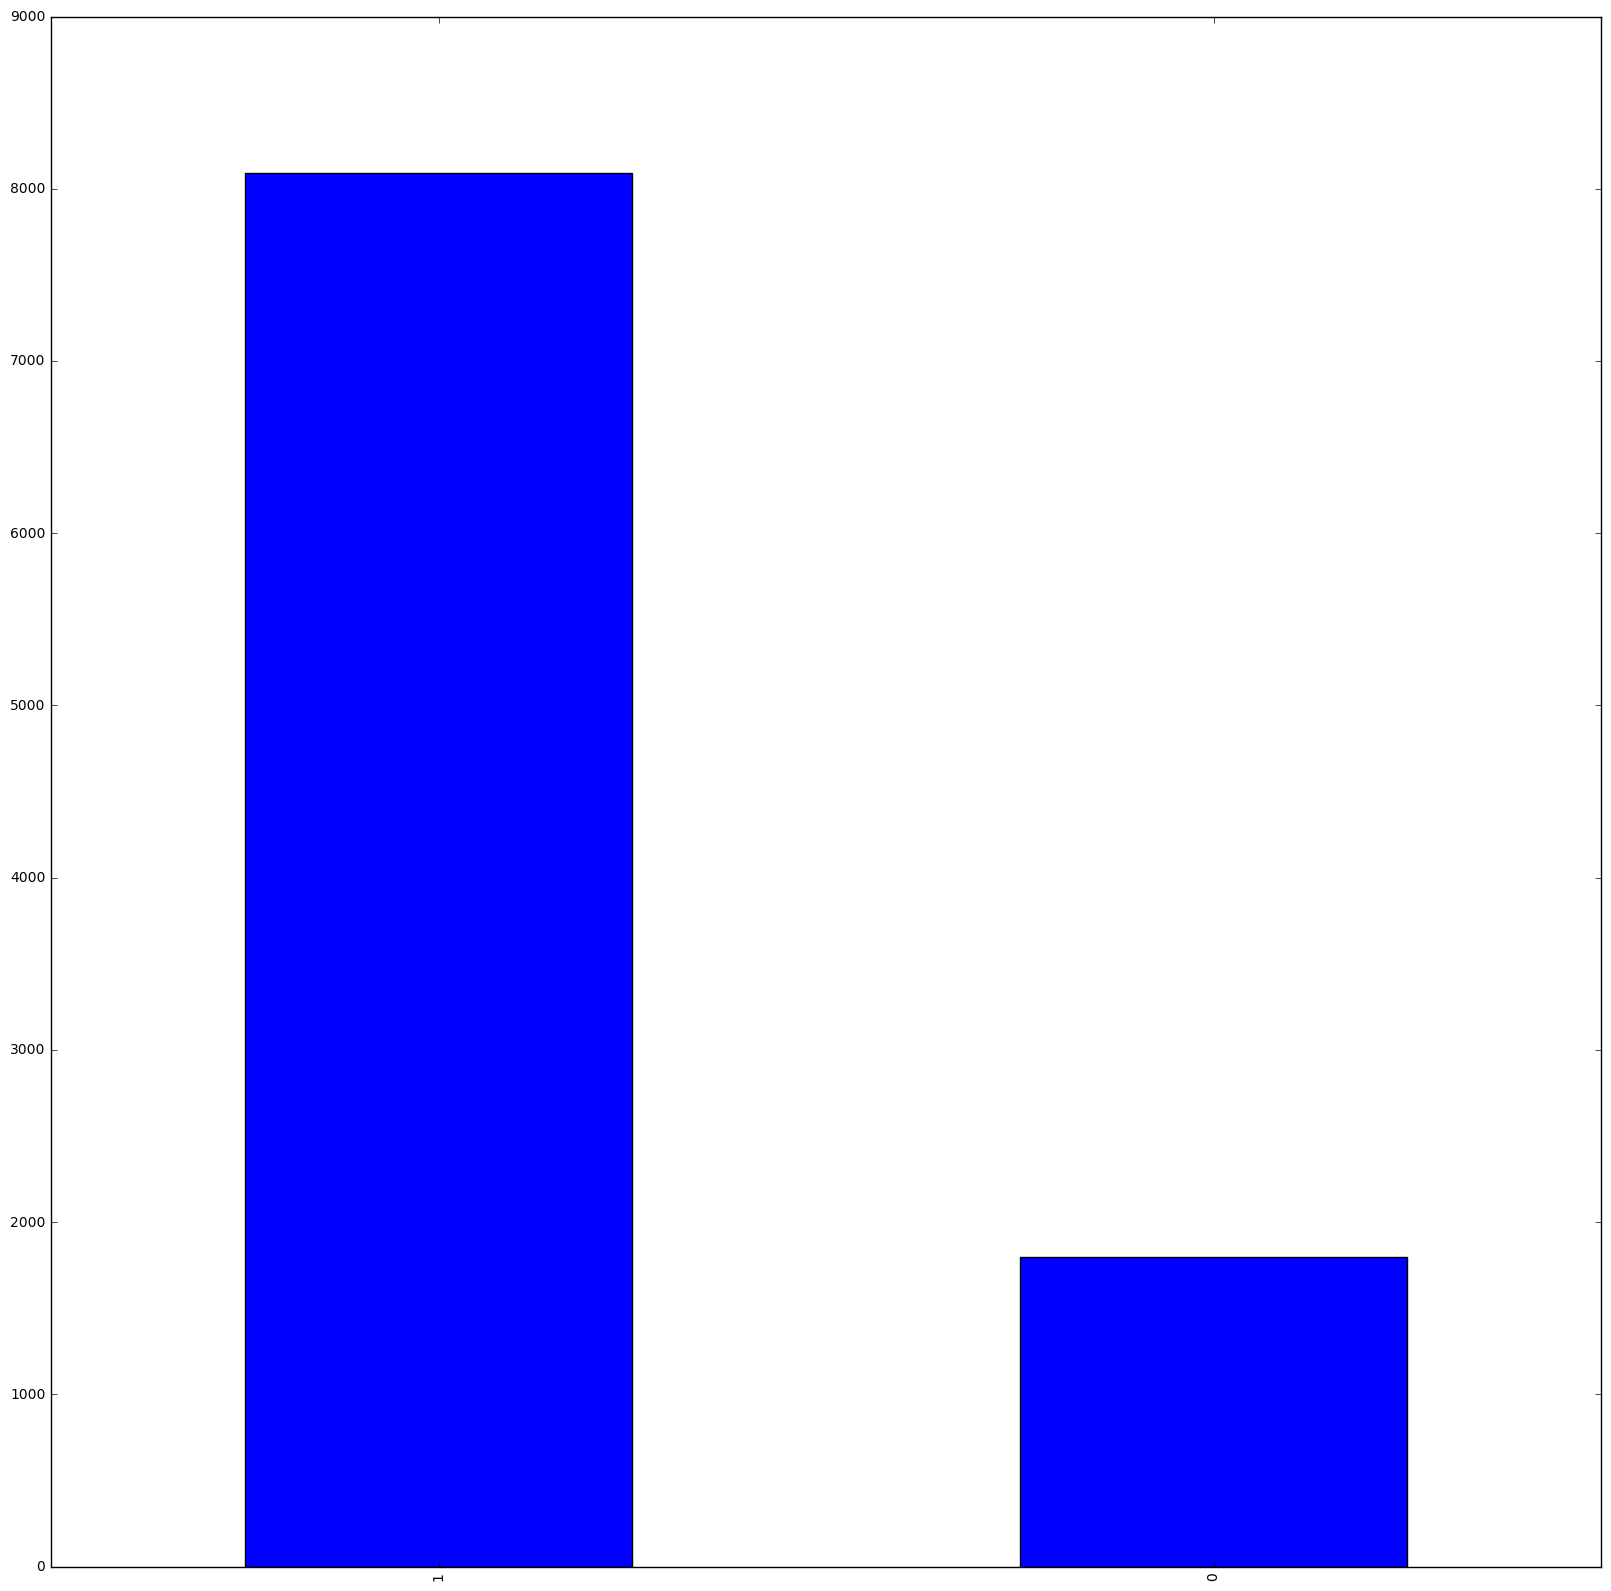

In [50]:
#Replotting is Featured Merchant as box plot

plt.figure(figsize=(20, 20))
dfmod['IsFeaturedMerchant'].value_counts().plot(kind='bar')

#plt.savefig('IsFeaturedMerchant-barplot.png')

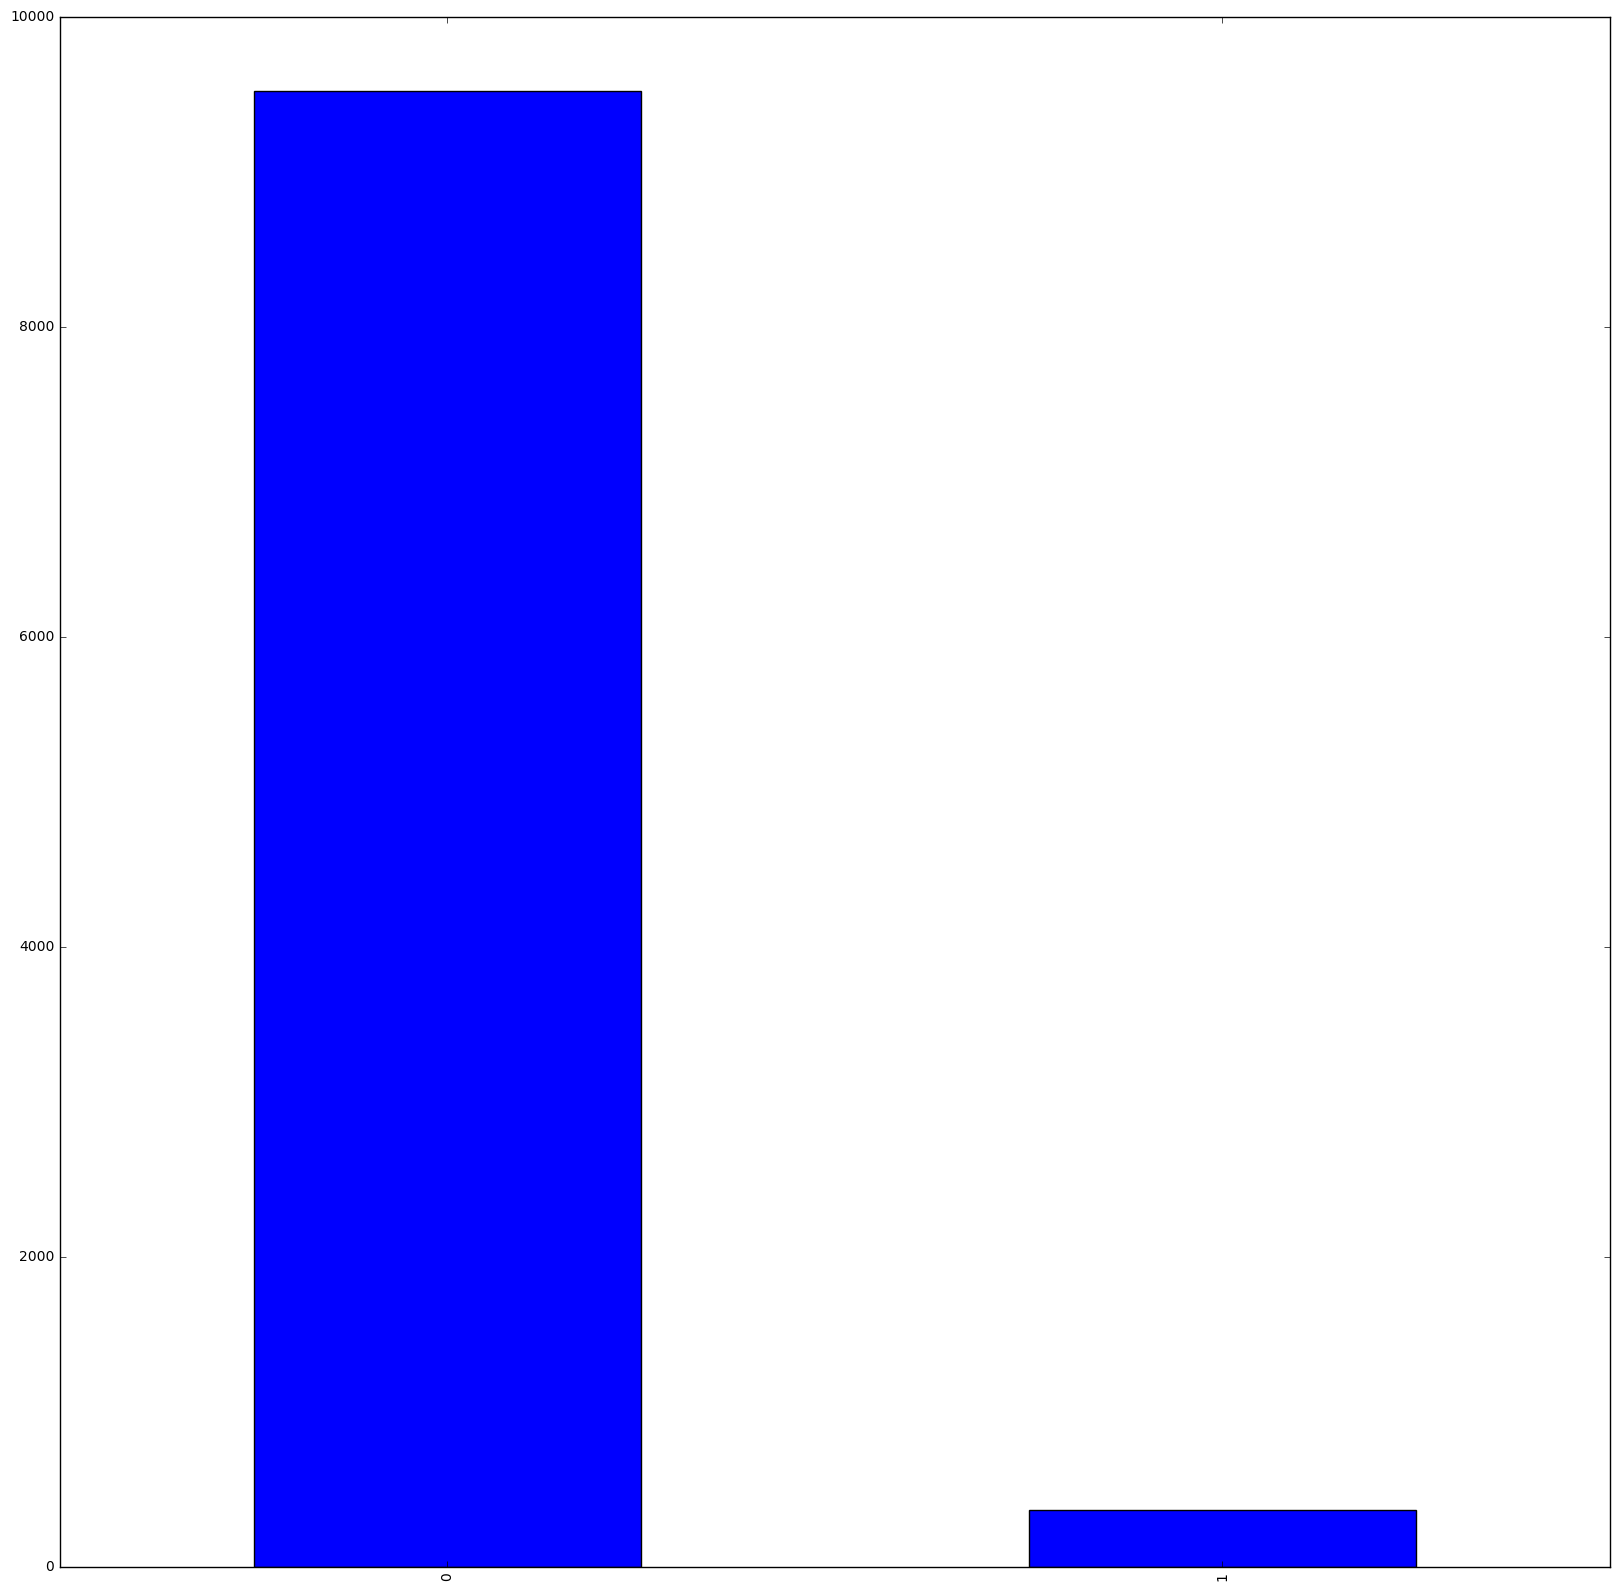

In [51]:
#Replotting is FulfilledbyAmazon as box plot

plt.figure(figsize=(20, 20))
dfmod['IsFulfilledByAmazon'].value_counts().plot(kind='bar')

#plt.savefig('IsFulfilledByAmazon-barplot.png')

# Q3 Relationships Between Feature Pairs

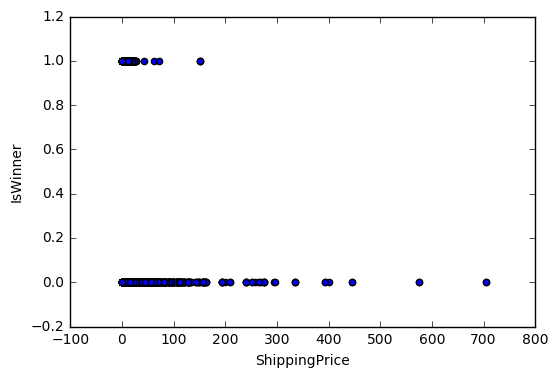

In [52]:
# Demonstrates a clustering of Low Shipping Price Corresponding with IsWinner

dfmod.plot(kind='scatter', x='ShippingPrice', y='IsWinner')
#plt.savefig('ShippingPrice-IsWinner-Scatter.png')

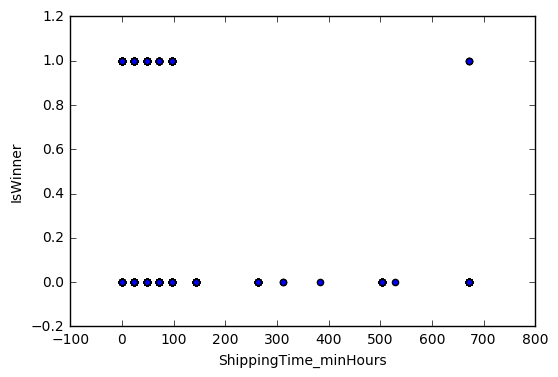

In [53]:
# Demonstrates a clustering of Low Shipping Time Corresponding with IsWinner

dfmod.plot(kind='scatter', x='ShippingTime_minHours', y='IsWinner')
#plt.savefig('ShippingTime-minHours-IsWinner-Scatter.png')

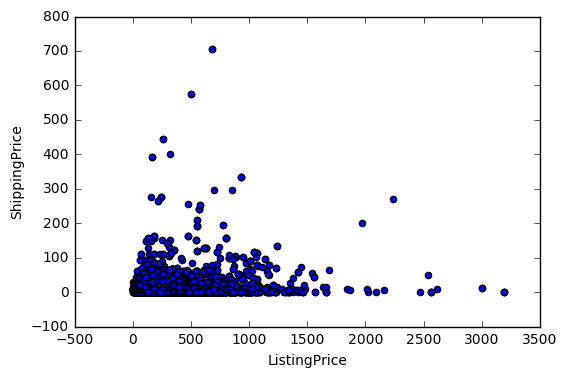

In [54]:
# Demonstrates a pattern of low listing price items having relatively high shipping prices.

dfmod.plot(kind='scatter', x='ListingPrice', y='ShippingPrice')
#plt.savefig('ListingPrice-ShippingPrice-Scatter.png')

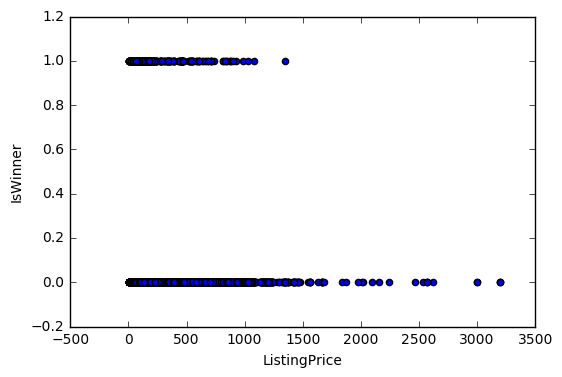

In [55]:
# Demonstrates a tendency for lower Listing Price items to be rated as winners.

dfmod.plot(kind='scatter', x='ListingPrice', y='IsWinner')
#plt.savefig('ListingPrice-IsWinner-Scatter.png')

In [ ]:
#Reviewing comparison of isFeaturedMerchant to isWinner

In [ ]:
#Reviewing comparison of isFulfilledbyAmazon to isWinner

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\danie\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


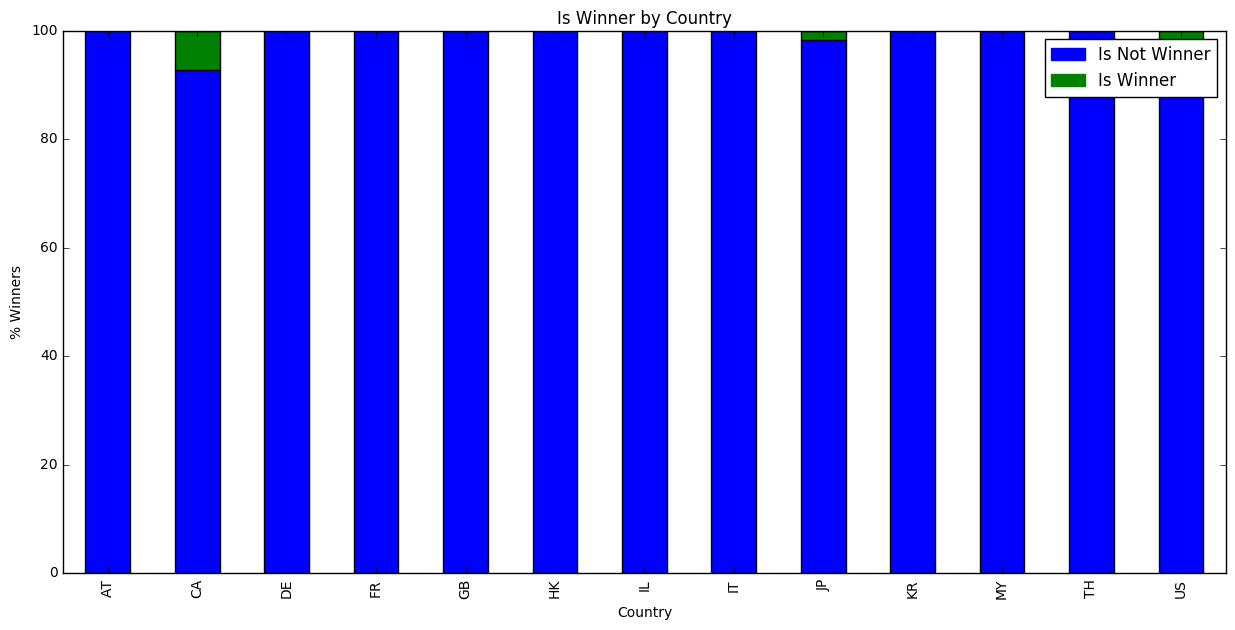

In [56]:
#This section develops a code for a barchar representing the % of isWinners per each country...
#Takes a long time to run - outputted graph included in report file.

uniqueCountry = pd.unique(dfmod.ShipsFromCountry.ravel())

dfmod['percent'] = 0

for country in uniqueCountry:
    count = 1/dfmod[dfmod.ShipsFromCountry == country].count()['IsWinner']
    index_list = dfmod[dfmod['ShipsFromCountry'] == country].index.tolist()
    for i in index_list:
        dfmod.loc[i, 'percent'] = count * 100

# Group dataframe by last_tweet and Elected and sum percent
group = dfmod[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Is Winner by Country", figsize=(15,7), sort_columns=True)

blue_patch = mpatches.Patch(color='blue', label='Is Not Winner')
green_patch = mpatches.Patch(color='green', label='Is Winner')
my_plot.legend(handles=[blue_patch, green_patch], frameon = True)

my_plot.set_xlabel("Country")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

#plt.savefig('BarComparison-UniqueCountry-IsWinner.png')